In [1]:
#PCA : 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("wine.csv") 
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [3]:
#Check null values
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [4]:
df.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
Customer_Segment          int64
dtype: object

In [5]:
#How many classes in customer_segment which want to predict
df["Customer_Segment"].value_counts()

2    71
1    59
3    48
Name: Customer_Segment, dtype: int64

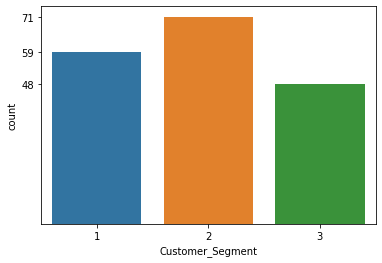

In [7]:
#visualize Customer_Segment
sns.countplot(data=df,x="Customer_Segment")
f=df["Customer_Segment"].value_counts()
plt.yticks(f)
plt.show()

In [8]:
#Select X input and Y output from dataset df
X=df.drop("Customer_Segment",axis=1)
Y=df["Customer_Segment"]

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,
                                                 random_state=1)

In [10]:
# Apply Scaling Standardization
#inbuilt class StandardScaler  use formula Z-score = (Xi-mean of(X))/std(X)
from sklearn.preprocessing import StandardScaler

In [11]:
#create object of StadardScaler class
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [12]:
X_train

array([[-1.10453814, -0.53090202, -0.13625741, ...,  0.51645351,
        -0.4182397 , -0.8519466 ],
       [-0.60884898, -0.79223988, -0.57322083, ...,  0.85655034,
         0.07607378,  0.73976188],
       [ 1.17054803, -0.47189024,  1.61159627, ...,  1.23915929,
         1.13335541,  0.66313697],
       ...,
       [ 0.68756884, -0.67421633, -0.42756636, ...,  0.09133246,
         0.28203774, -0.87981021],
       [-0.02418996,  0.29526283,  1.24746009, ..., -0.80142174,
        -0.36331598, -0.43399251],
       [ 0.12832978, -0.68264658,  0.70125581, ...,  0.68650193,
        -0.08869738,  1.3248976 ]])

In [13]:
X.shape

(178, 13)

In [14]:
#Apply PCA
from sklearn.decomposition import PCA

In [15]:
#create object of PCA class
pc1=PCA(n_components=None,random_state=1)
#n_components  inbuilt parameters ,here  pass no. of components means PC here 
#total input 13 features input features

In [16]:
X_train_pc1=pc1.fit_transform(X_train)
X_test_pc1=pc1.transform(X_test)

In [17]:
explain_variance=pc1.explained_variance_ratio_
#explained_variance_ratio_ inbuilt method of PCA class , it is used to 
#show variance of all input features
print(explain_variance) #automatic arrange variance in descending order

[0.35168281 0.19739103 0.11318949 0.07729222 0.06125164 0.05129145
 0.04229866 0.02624925 0.02426134 0.01824268 0.01580332 0.01324335
 0.00780277]


In [19]:
#.35+.19=.54
#Again Create object of PCA ,pass 2 features (not know which feature take
#those features whose highest variance)
pc2=PCA(n_components=2,random_state=1)

In [20]:
X_train_pc2=pc2.fit_transform(X_train)
X_test_pc2=pc2.transform(X_test)

In [21]:
pc2.explained_variance_ratio_

array([0.35168281, 0.19739103])

In [24]:
#Perform model witj logistic regression class (because classification problem)
from sklearn.linear_model import LogisticRegression

In [25]:
#create object of class  LogisticRegression
lr= LogisticRegression()

In [26]:
#train the model
lr.fit(X_train_pc2,Y_train)

LogisticRegression()

In [27]:
#test the model
Y_pred=lr.predict(X_test_pc2)

In [28]:
#Generate classification report and confusion matrix
from sklearn.metrics import classification_report,confusion_matrix

In [29]:
print(classification_report(Y_test,Y_pred))

print(confusion_matrix(Y_test,Y_pred))

              precision    recall  f1-score   support

           1       0.96      1.00      0.98        23
           2       1.00      0.95      0.97        19
           3       1.00      1.00      1.00        12

    accuracy                           0.98        54
   macro avg       0.99      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

[[23  0  0]
 [ 1 18  0]
 [ 0  0 12]]
